# Vessel Data available from marinetraffic.com

In this notebook the sanitized vessel track data from marinetraffic.com is visualy inspected. Data is located in `data/marine-traffic/sanitized` in the form of csv data files

In [1]:
# load dependecies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from glob import glob
from os import path
from mpl_toolkits.basemap import Basemap
from config import VESSEL_NAMES
from plot_mtdata import plot_track

from collections import defaultdict

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# make plots interactive
%matplotlib notebook

%reload_ext autoreload
%autoreload 2


In [2]:
vessels = dict()
for vessel_file in glob(path.join('../../data/marine-traffic/sanitized/*.csv')):
    print(f'processing file {vessel_file}')
    vessel = vessel_file.split('/')[-1].split('.')[0]
    vessels[vessel] = pd.read_csv(vessel_file)
    vessels[vessel].epoch = pd.to_datetime(vessels[vessel].epoch, utc=True)
    vessels[vessel].set_index('epoch', inplace = True)
    
    if vessels[vessel].index.has_duplicates:
        vessels[vessel] = vessels[vessel][~vessels[vessel].index.duplicated(keep='first')]
    print(f'before resampling: len(vessels[vessel]) = {len(vessels[vessel])}')
    vessels[vessel] = vessels[vessel].resample('1h').pad()
    print(f'before dropping NaNs: len(vessels[vessel]) = {len(vessels[vessel])}')
    vessels[vessel].dropna(inplace=True)
    print(f'after dropping NaNs: len(vessels[vessel]) = {len(vessels[vessel])}')
    vessels[vessel].drop_duplicates(inplace=True, ignore_index=False)
    print(f'after dropping duplicate rows: len(vessels[vessel]) = {len(vessels[vessel])}')

processing file ../../data/marine-traffic/sanitized/235090598_blue-tern.csv
before resampling: len(vessels[vessel]) = 42261
before dropping NaNs: len(vessels[vessel]) = 47430
after dropping NaNs: len(vessels[vessel]) = 47429
after dropping duplicate rows: len(vessels[vessel]) = 42219
processing file ../../data/marine-traffic/sanitized/245924000_mpi-adventure.csv
before resampling: len(vessels[vessel]) = 87082
before dropping NaNs: len(vessels[vessel]) = 104142
after dropping NaNs: len(vessels[vessel]) = 104141
after dropping duplicate rows: len(vessels[vessel]) = 84761
processing file ../../data/marine-traffic/sanitized/219019002_sea-challenger.csv
before resampling: len(vessels[vessel]) = 59129
before dropping NaNs: len(vessels[vessel]) = 69265
after dropping NaNs: len(vessels[vessel]) = 69263
after dropping duplicate rows: len(vessels[vessel]) = 58649
processing file ../../data/marine-traffic/sanitized/253609000_taillevent.csv
before resampling: len(vessels[vessel]) = 8
before droppi

In [14]:
wind_farms = pd.read_csv('../../data/wind-farms/wind-farms-2.txt')
wind_farms.insert(loc=0, column='key_name', value=wind_farms.windfarm_name.apply(lambda x: x.lower().replace('&', '_').replace(' ', '_').replace('/', '_')))
wind_farms.set_index('key_name', inplace=True)
wind_farms.construction_begin = pd.to_datetime(wind_farms.construction_begin, utc=True)
wind_farms.construction_end = pd.to_datetime(wind_farms.construction_end, utc=True)

In [15]:
wind_farms

,windfarm_name,construction_begin,construction_end,longitude,latitude
key_name,,,,,
norther_offshore_wind_farm,norther offshore wind farm,2018-08-01 00:00:00+00:00,2019-08-01 00:00:00+00:00,3.014000,51.527000
hohe_see,hohe see,2018-04-01 00:00:00+00:00,2021-08-01 00:00:00+00:00,6.316667,54.433333
veja_mate,veja mate,2016-04-01 00:00:00+00:00,2017-05-01 00:00:00+00:00,5.870833,54.316944
bard_offshore_1,bard offshore 1,2009-06-01 00:00:00+00:00,2013-07-01 00:00:00+00:00,5.975000,54.358333
global_tech_1,global tech 1,2012-07-01 00:00:00+00:00,2014-08-01 00:00:00+00:00,6.358000,54.500000
merkur,merkur,2017-04-01 00:00:00+00:00,2018-09-01 00:00:00+00:00,6.550000,54.033000
arkona,arkona,2017-08-01 00:00:00+00:00,2018-02-01 00:00:00+00:00,14.121000,54.782000
wikinger,wikinger,2016-02-01 00:00:00+00:00,2017-10-01 00:00:00+00:00,14.068000,54.843000
nordsee_one,nordsee one,2015-12-15 00:00:00+00:00,2017-09-22 00:00:00+00:00,6.800000,53.967000


## Plot all wind farms found in a vessel's track record
---

In [7]:
search_window_size = 0.3 # deg lon/lat e.g. 11 km
vessel_farms = defaultdict(dict)

for vessel, data in vessels.items():
    print(f'processing {vessel}')
    for farm_index, farm in wind_farms.iterrows():
        num_data_points = 0
        try:
            num_data_points = len(data[farm.construction_begin:farm.construction_end])
        except Exception as e:
            print(f'failed to index vessel data: {e}')
            continue
            
        if num_data_points > 0:
            print(f'    found vessel data for wind farm {farm.windfarm_name} construction period: {farm.construction_begin} -> {farm.construction_end}')
            
            # construct search window
            lat_min = farm.latitude - search_window_size
            lat_max = farm.latitude + search_window_size            
            lon_min = farm.longitude - search_window_size
            lon_max = farm.longitude + search_window_size

            
            d = vessels[vessel][farm.construction_begin:farm.construction_end][
                (vessels[vessel][farm.construction_begin:farm.construction_end].latitude > lat_min) &
                (vessels[vessel][farm.construction_begin:farm.construction_end].latitude < lat_max) &
                (vessels[vessel][farm.construction_begin:farm.construction_end].longitude > lon_min) &
                (vessels[vessel][farm.construction_begin:farm.construction_end].longitude < lon_max) &
                (vessels[vessel][farm.construction_begin:farm.construction_end].speed == 0)
            ]
            
            if len(d) > 100:
                print(f'        found {len(d)} vessel positions in search windows for wind farm {farm.windfarm_name}')
                vessel_farms[vessel][farm_index] = d


processing 235090598_blue-tern
    found vessel data for wind farm norther offshore wind farm construction period: 2018-08-01 00:00:00+00:00 -> 2019-08-01 00:00:00+00:00
    found vessel data for wind farm hohe see construction period: 2018-04-01 00:00:00+00:00 -> 2021-08-01 00:00:00+00:00
        found 1579 vessel positions in search windows for wind farm hohe see
    found vessel data for wind farm veja mate construction period: 2016-04-01 00:00:00+00:00 -> 2017-05-01 00:00:00+00:00
    found vessel data for wind farm merkur construction period: 2017-04-01 00:00:00+00:00 -> 2018-09-01 00:00:00+00:00
        found 2287 vessel positions in search windows for wind farm merkur
    found vessel data for wind farm arkona construction period: 2017-08-01 00:00:00+00:00 -> 2018-02-01 00:00:00+00:00
    found vessel data for wind farm wikinger construction period: 2016-02-01 00:00:00+00:00 -> 2017-10-01 00:00:00+00:00
    found vessel data for wind farm nordsee one construction period: 2015-12

    found vessel data for wind farm ormonde construction period: 2010-05-01 00:00:00+00:00 -> 2011-08-30 00:00:00+00:00
    found vessel data for wind farm luchterduinen construction period: 2013-10-01 00:00:00+00:00 -> 2015-06-30 00:00:00+00:00
    found vessel data for wind farm walney 1 construction period: 2010-04-01 00:00:00+00:00 -> 2011-05-30 00:00:00+00:00
    found vessel data for wind farm walney 2 construction period: 2011-03-01 00:00:00+00:00 -> 2011-11-30 00:00:00+00:00
    found vessel data for wind farm hornsrev 3 construction period: 2017-10-01 00:00:00+00:00 -> 2019-08-30 00:00:00+00:00
    found vessel data for wind farm belwind construction period: 2009-08-01 00:00:00+00:00 -> 2010-10-31 00:00:00+00:00
    found vessel data for wind farm london array construction period: 2011-03-01 00:00:00+00:00 -> 2013-06-30 00:00:00+00:00
        found 937 vessel positions in search windows for wind farm london array
processing 219019002_sea-challenger
    found vessel data for wi

    found vessel data for wind farm ormonde construction period: 2010-05-01 00:00:00+00:00 -> 2011-08-30 00:00:00+00:00
    found vessel data for wind farm luchterduinen construction period: 2013-10-01 00:00:00+00:00 -> 2015-06-30 00:00:00+00:00
    found vessel data for wind farm walney 1 construction period: 2010-04-01 00:00:00+00:00 -> 2011-05-30 00:00:00+00:00
    found vessel data for wind farm walney 2 construction period: 2011-03-01 00:00:00+00:00 -> 2011-11-30 00:00:00+00:00
    found vessel data for wind farm hornsrev 3 construction period: 2017-10-01 00:00:00+00:00 -> 2019-08-30 00:00:00+00:00
    found vessel data for wind farm london array construction period: 2011-03-01 00:00:00+00:00 -> 2013-06-30 00:00:00+00:00
processing 245179000_aeolus
    found vessel data for wind farm norther offshore wind farm construction period: 2018-08-01 00:00:00+00:00 -> 2019-08-01 00:00:00+00:00
        found 816 vessel positions in search windows for wind farm norther offshore wind farm
   

    found vessel data for wind farm nordsee ost construction period: 2013-08-01 00:00:00+00:00 -> 2014-08-01 00:00:00+00:00
    found vessel data for wind farm butendiek construction period: 2014-06-01 00:00:00+00:00 -> 2015-06-11 00:00:00+00:00
        found 1870 vessel positions in search windows for wind farm butendiek
    found vessel data for wind farm dantysk construction period: 2013-02-01 00:00:00+00:00 -> 2014-08-01 00:00:00+00:00
    found vessel data for wind farm baltic 2 construction period: 2013-08-01 00:00:00+00:00 -> 2015-04-01 00:00:00+00:00
    found vessel data for wind farm meerwind suedost construction period: 2012-08-01 00:00:00+00:00 -> 2014-09-01 00:00:00+00:00
    found vessel data for wind farm sandbank construction period: 2015-04-01 00:00:00+00:00 -> 2017-01-21 00:00:00+00:00
    found vessel data for wind farm gode wind 2 construction period: 2015-04-01 00:00:00+00:00 -> 2017-06-01 00:00:00+00:00
    found vessel data for wind farm deutsche bucht constructi

    found vessel data for wind farm walnes construction period: 2010-04-01 00:00:00+00:00 -> 2018-04-01 00:00:00+00:00
    found vessel data for wind farm lincs construction period: 2010-03-01 00:00:00+00:00 -> 2013-03-01 00:00:00+00:00
    found vessel data for wind farm westmost rough construction period: 2014-02-01 00:00:00+00:00 -> 2015-05-01 00:00:00+00:00
    found vessel data for wind farm sheringham shoal construction period: 2009-09-01 00:00:00+00:00 -> 2012-07-30 00:00:00+00:00
    found vessel data for wind farm lincs construction period: 2010-03-01 00:00:00+00:00 -> 2013-03-30 00:00:00+00:00
    found vessel data for wind farm kriegers flak construction period: 2020-05-01 00:00:00+00:00 -> 2021-06-05 00:00:00+00:00
    found vessel data for wind farm northwester 2 construction period: 2019-07-01 00:00:00+00:00 -> 2020-05-01 00:00:00+00:00
    found vessel data for wind farm nobelwind construction period: 2016-09-22 00:00:00+00:00 -> 2017-05-30 00:00:00+00:00
    found vesse

In [8]:
def draw_screen_poly( lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='red', zorder=5 )
    plt.gca().add_patch(poly)

def plot_vessel_farms(vessel : pd.DataFrame, vessel_farms : dict, wind_farms : pd.DataFrame, search_window_size=0.2, figsize=(16,9), margin=0.3):
    # create new figure, axes instances.
    fig = plt.figure(figsize=figsize)
    
    # to create the figure, we need the complete minima and maxima of the vessel coordinates
    
    min_lat = 0
    max_lat = 0
    min_lon = 0
    max_lon = 0

    for i, (farm_key, data) in enumerate(vessel_farms.items()):
        # find local min and max:
        # if we are at the first wind farm, just store the local min and max
        if i == 0:
            min_lat = data.latitude.min() - margin
            max_lat = data.latitude.max() + margin
            min_lon = data.longitude.min() - margin
            max_lon = data.longitude.max() + margin
            
        else: 

            local_min_lat = data.latitude.min() - margin
            local_max_lat = data.latitude.max() + margin
            local_min_lon = data.longitude.min() - margin
            local_max_lon = data.longitude.max() + margin

            if local_min_lat < min_lat:
                min_lat = local_min_lat
            if local_max_lat > max_lat:
                max_lat = local_max_lat
            if local_min_lon < min_lon:
                min_lon = local_min_lon
            if local_max_lon > max_lon:
                max_lon = local_max_lon
    
    print(min_lat, max_lat, min_lon, max_lon)
        
    

    m = Basemap(llcrnrlon=min_lon,
                llcrnrlat=min_lat,
                urcrnrlon=max_lon,
                urcrnrlat=max_lat,
                resolution='h',
                projection='merc',
                lat_0=(max_lat - min_lat)/2,
                lon_0=(max_lon - min_lon)/2,
               )

    m.drawcoastlines()
    m.fillcontinents()
    # m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color = 'white',lake_color='#46bcec')
    # draw parallels
    m.drawparallels(np.arange(-90,90,2),labels=[1,1,1,1])
    # draw meridians
    m.drawmeridians(np.arange(-180,180,2),labels=[1,1,1,1])
    
    ## iterate over the selected wind farms again and add them to the map
    for farm_key, data in vessel_farms.items():
        # draw the wind farm center and a rectangular region around it
        farm_lon, farm_lat = m(wind_farms.loc[farm_key].longitude, wind_farms.loc[farm_key].latitude)
        m.scatter(farm_lon, farm_lat, marker='s', color='tab:green', zorder = 5, s = 50)
        
        min_lat = wind_farms.loc[farm_key].latitude - search_window_size
        max_lat = wind_farms.loc[farm_key].latitude + search_window_size
        min_lon = wind_farms.loc[farm_key].longitude - search_window_size
        max_lon = wind_farms.loc[farm_key].longitude + search_window_size
        
        poly = Polygon(
            [
                (m(min_lon, min_lat)),
                (m(min_lon, max_lat)),
                (m(max_lon, max_lat)),
                (m(max_lon, min_lat)),
            ],
            edgecolor='tab:red',
            linewidth=3
        )
        
        plt.gca().add_patch(poly)
        
        # draw vessel positions
        park_vessel_lon, park_vessel_lat = m(data.longitude, data.latitude)
        m.scatter(park_vessel_lon, park_vessel_lat, marker = 'o', color='tab:red', zorder = 5, s = 2)
        
        plt.annotate(f'{wind_farms.loc[farm_key].windfarm_name}', xy=(farm_lon, farm_lat), zorder=5)
        
    vessel_lon, vessel_lat = m(vessel.longitude, vessel.latitude)
    m.scatter(vessel_lon, vessel_lat, marker = 's', color='tab:orange', zorder = 1, s = 2)
    


processing: 235090598_blue-tern


<IPython.core.display.Javascript object>


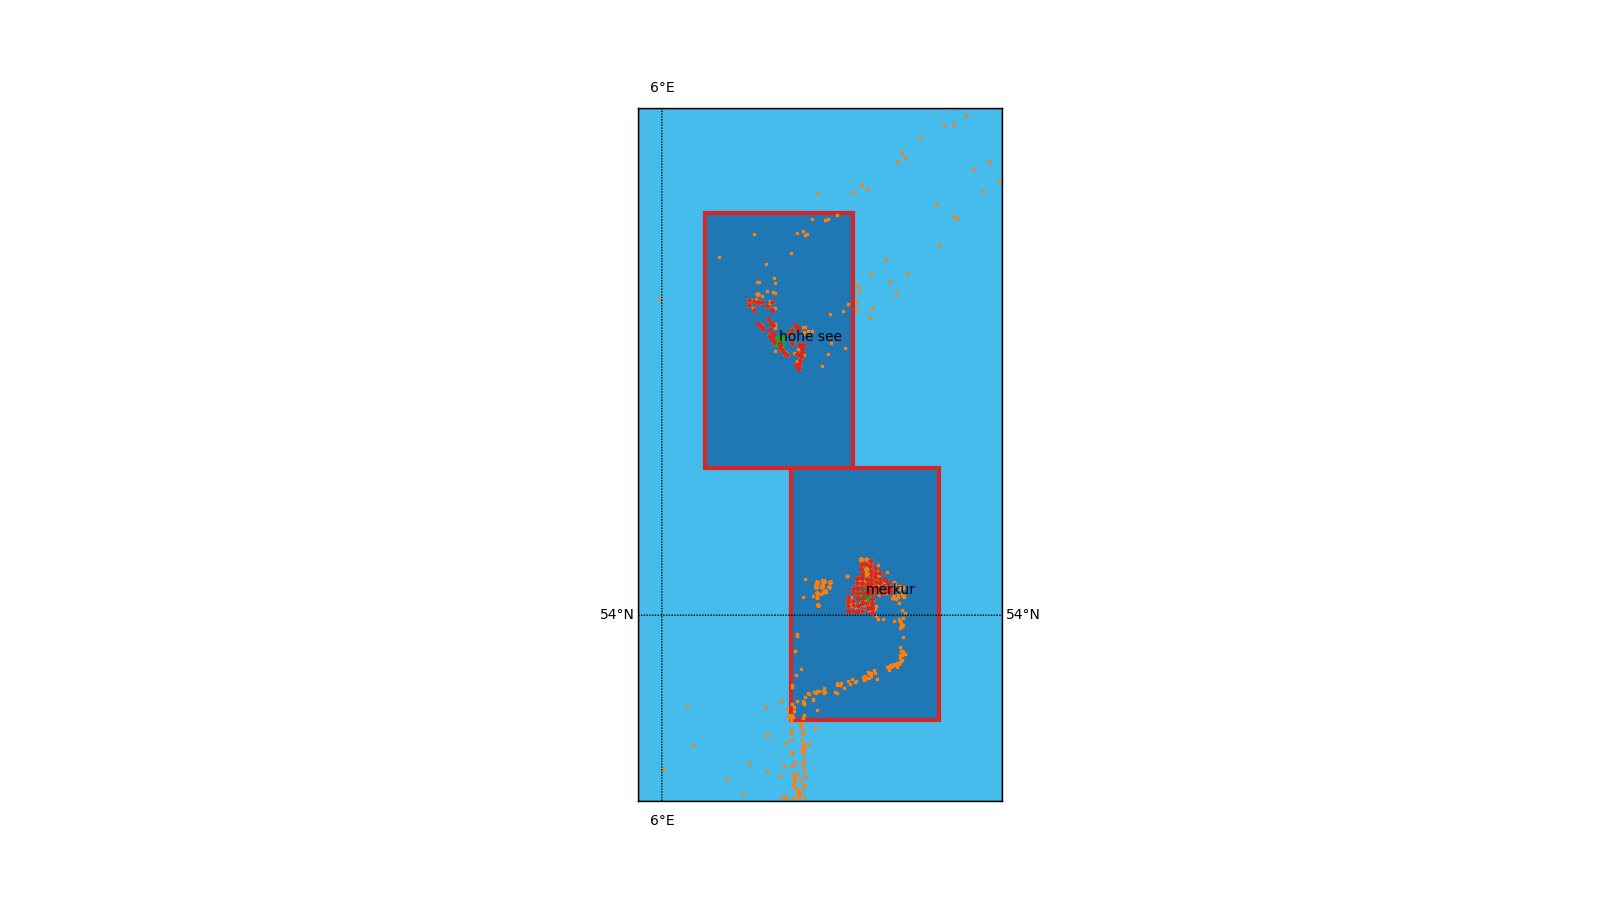

53.70389 54.79774 5.936168 6.918705
processing: 245924000_mpi-adventure


<IPython.core.display.Javascript object>


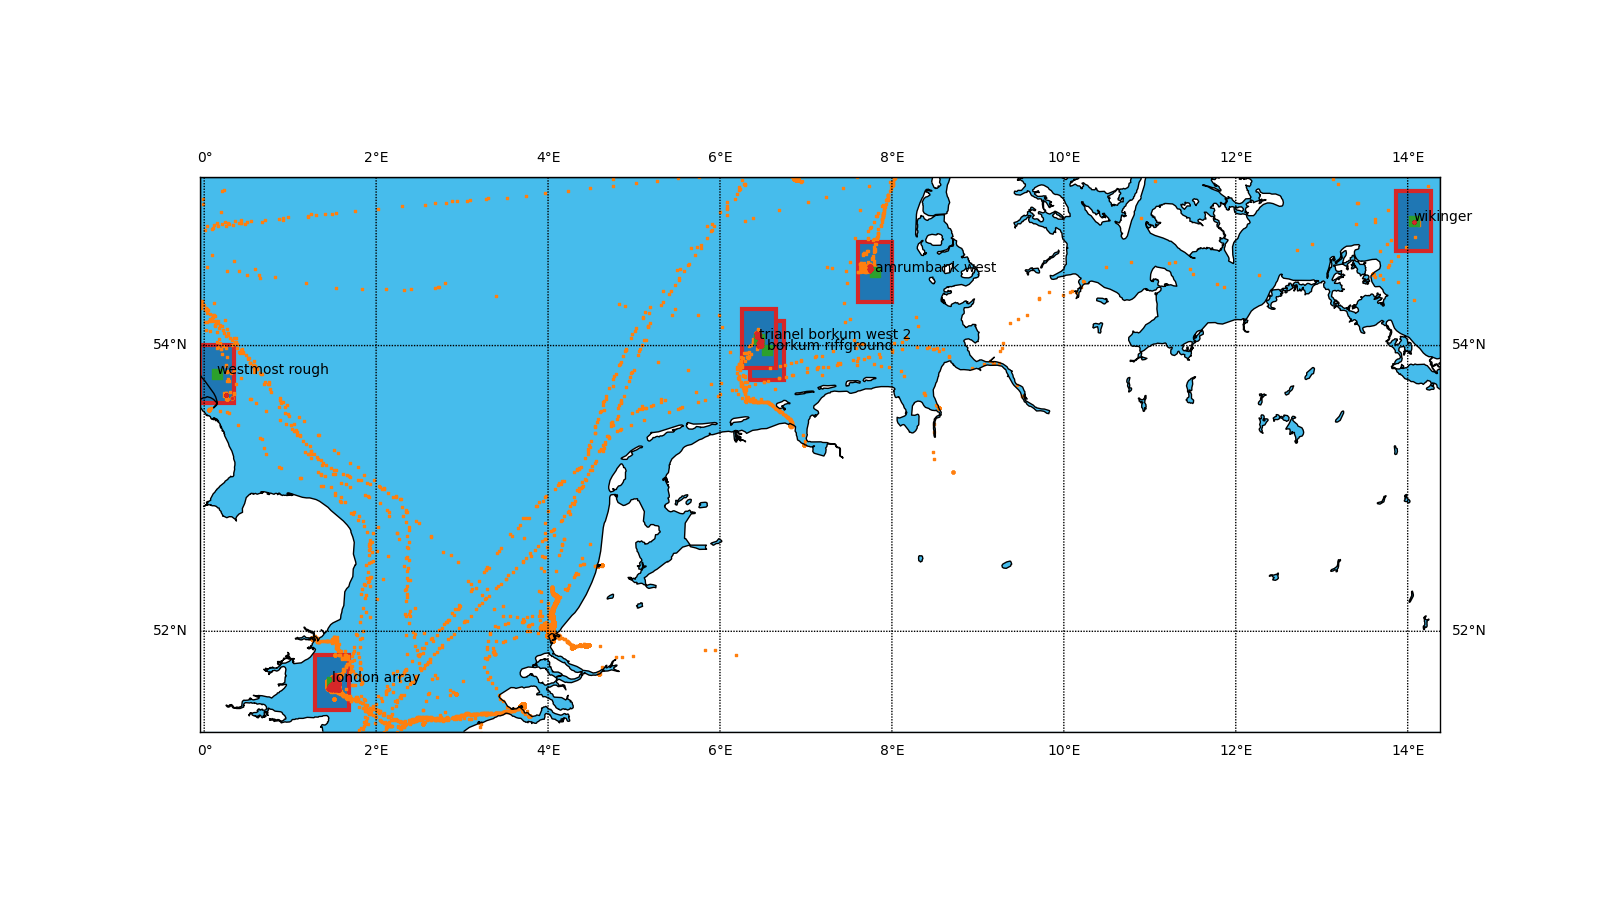

51.275830000000006 55.13419 -0.04883329999999997 14.37593
processing: 219019002_sea-challenger


<IPython.core.display.Javascript object>


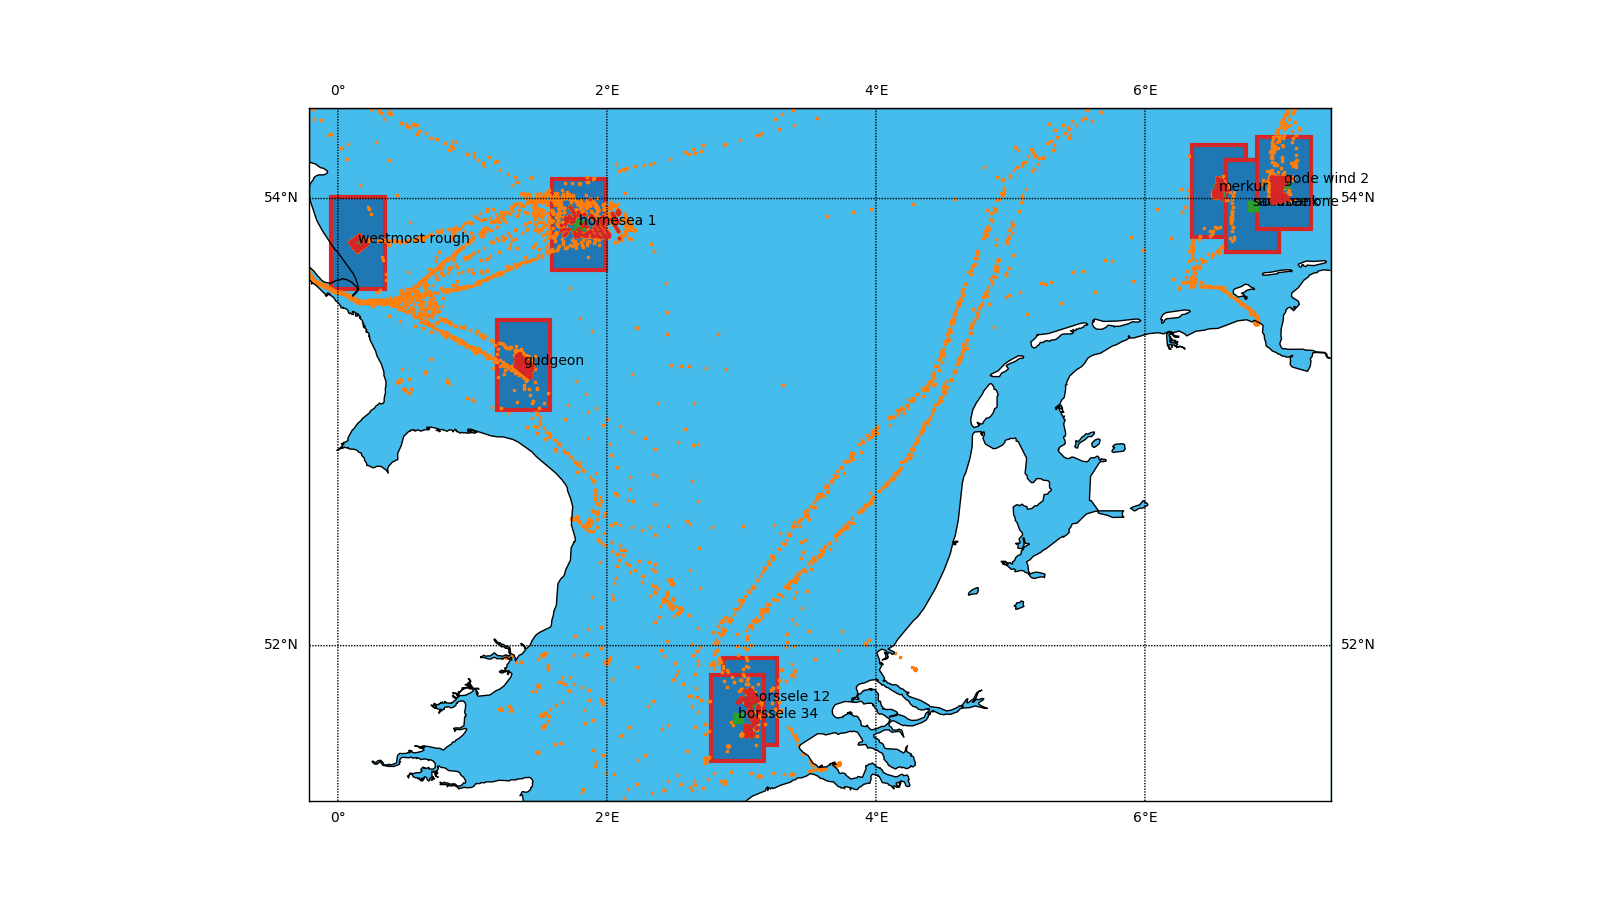

51.28325 54.393829999999994 -0.21116999999999997 7.379834
processing: 253609000_taillevent


<IPython.core.display.Javascript object>


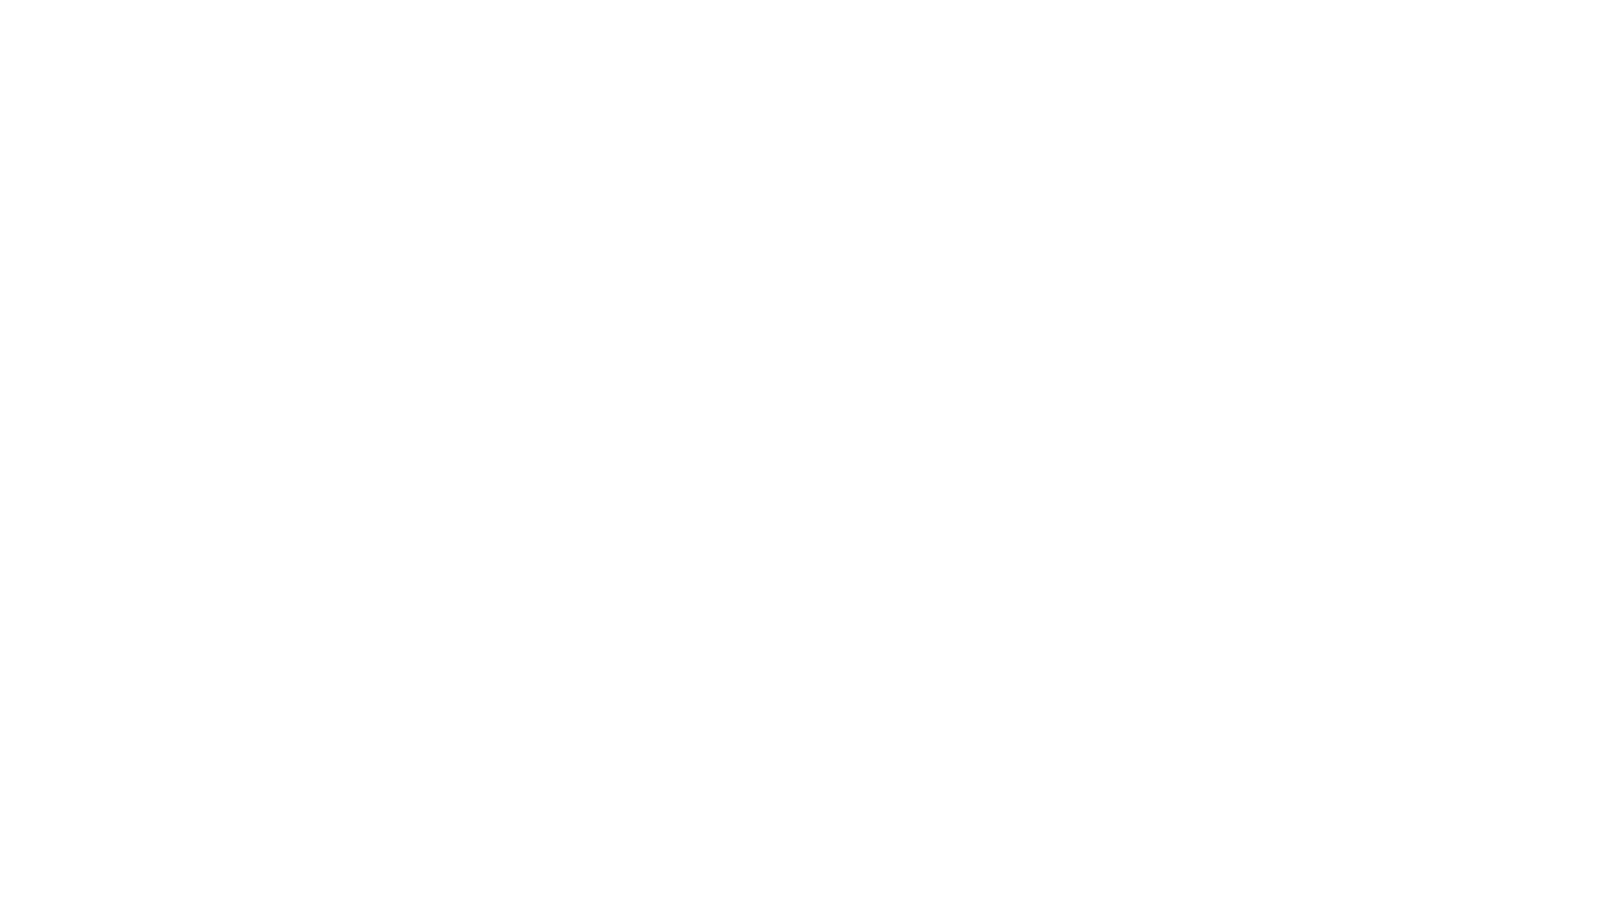

0 0 0 0
failed to plot vessel wind farms: float division by zero
processing: 253366000_vole-au-vent


<IPython.core.display.Javascript object>


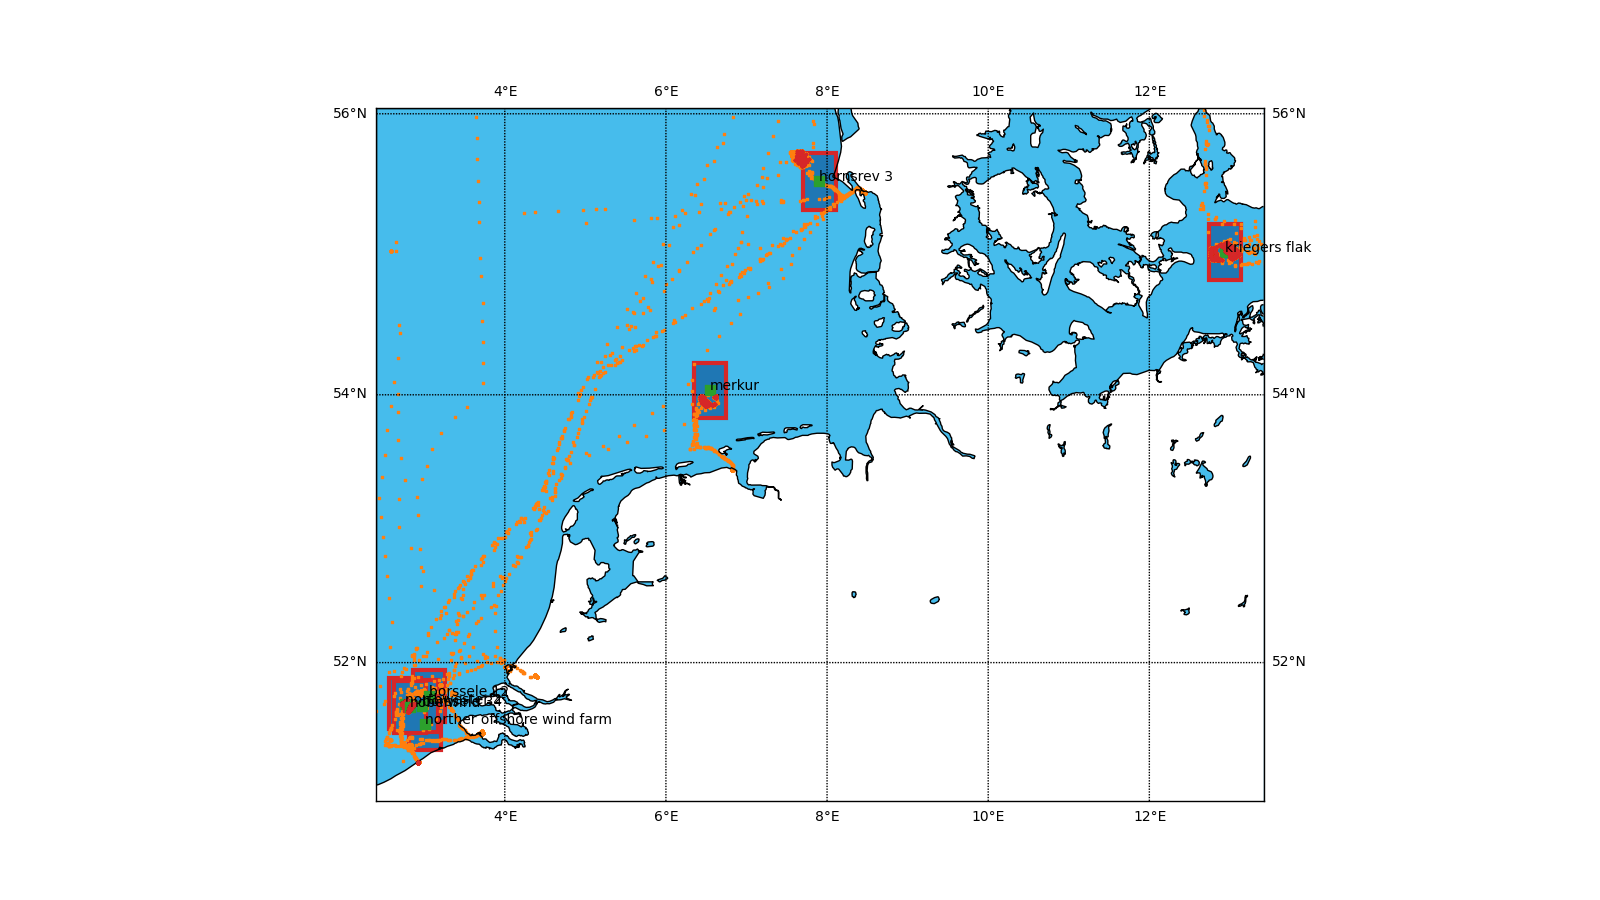

50.929970000000004 56.040049999999994 2.407217 13.41755
processing: 246777000_mpi-resolution


<IPython.core.display.Javascript object>


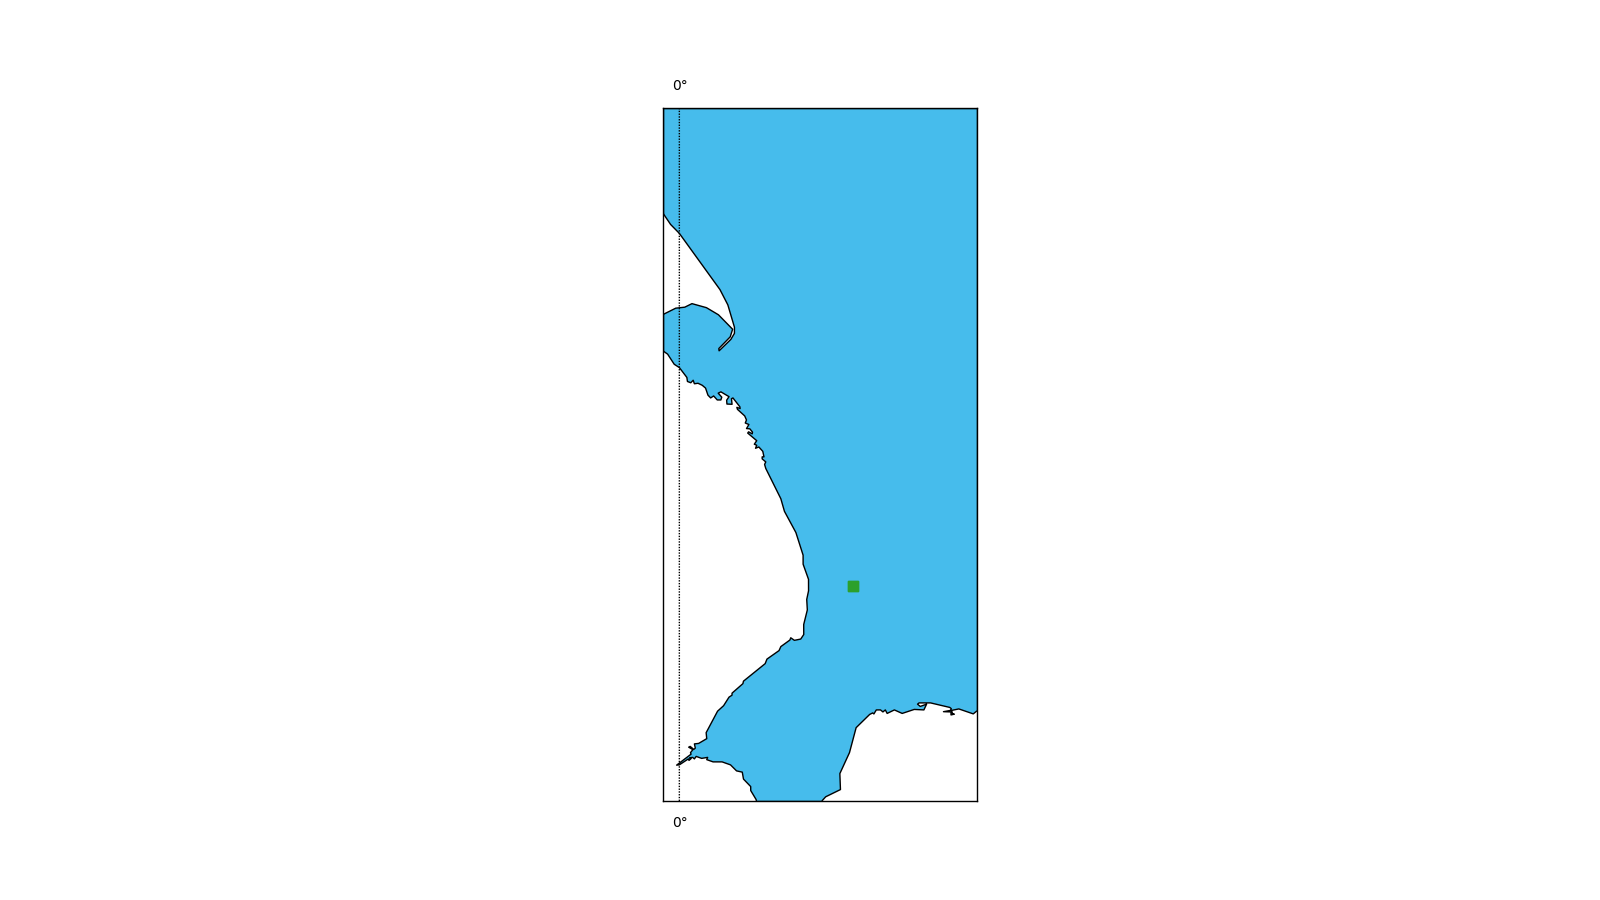

52.825050000000005 53.96834 -0.04518 0.8235683
failed to plot vessel wind farms: too many values to unpack (expected 2)
processing: 245179000_aeolus


<IPython.core.display.Javascript object>


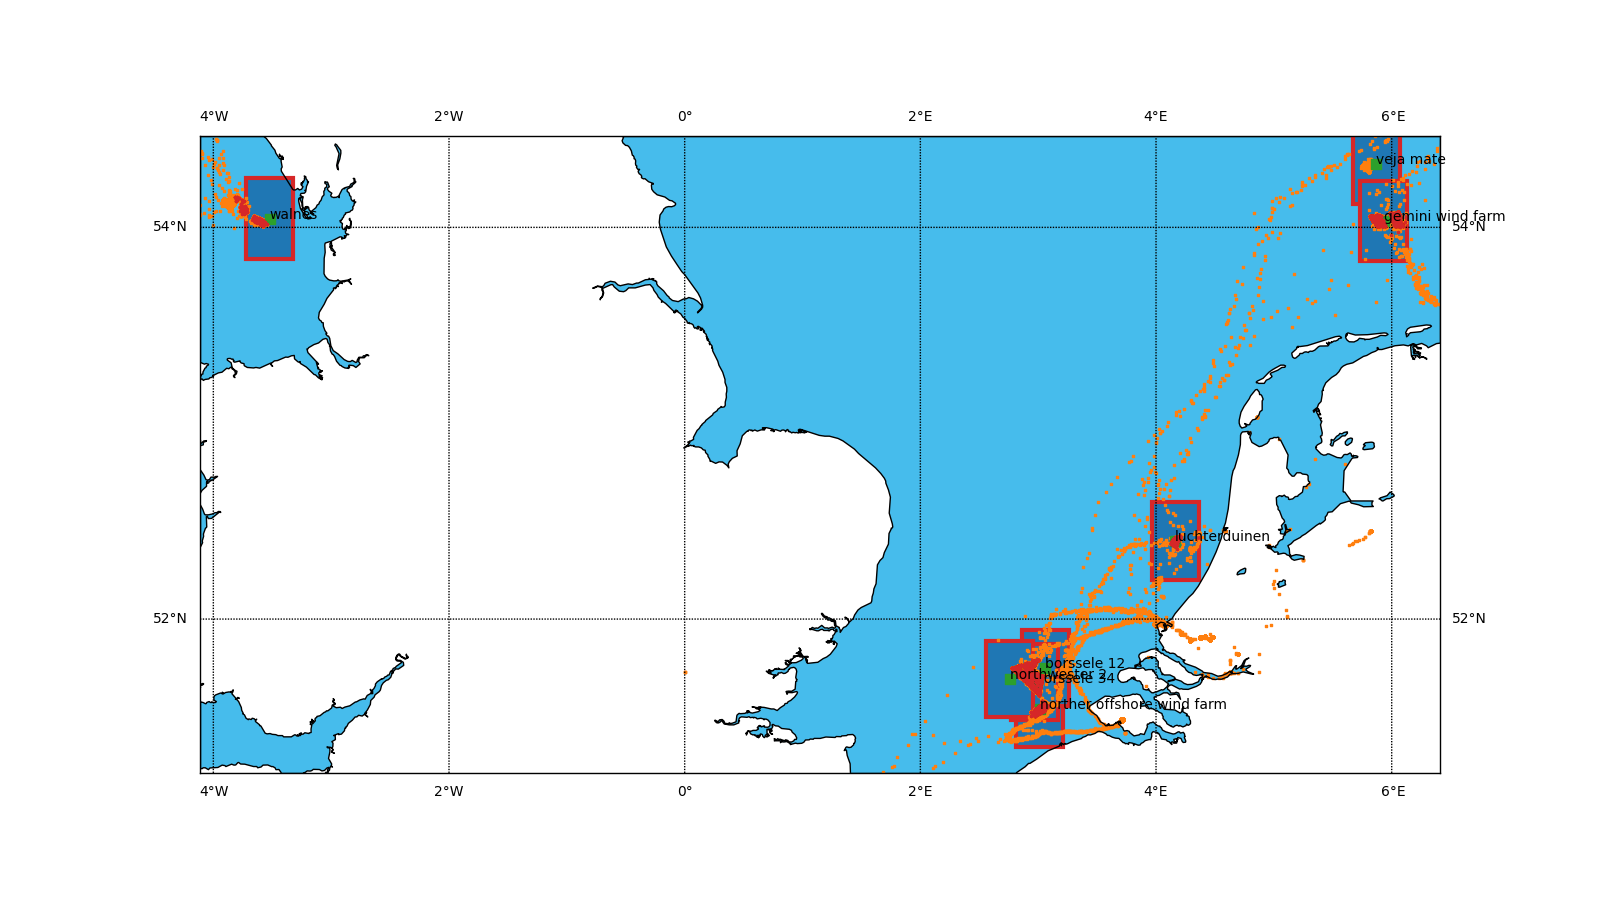

51.18883 54.452999999999996 -4.113167 6.409892
processing: 229080000_bold-tern


<IPython.core.display.Javascript object>


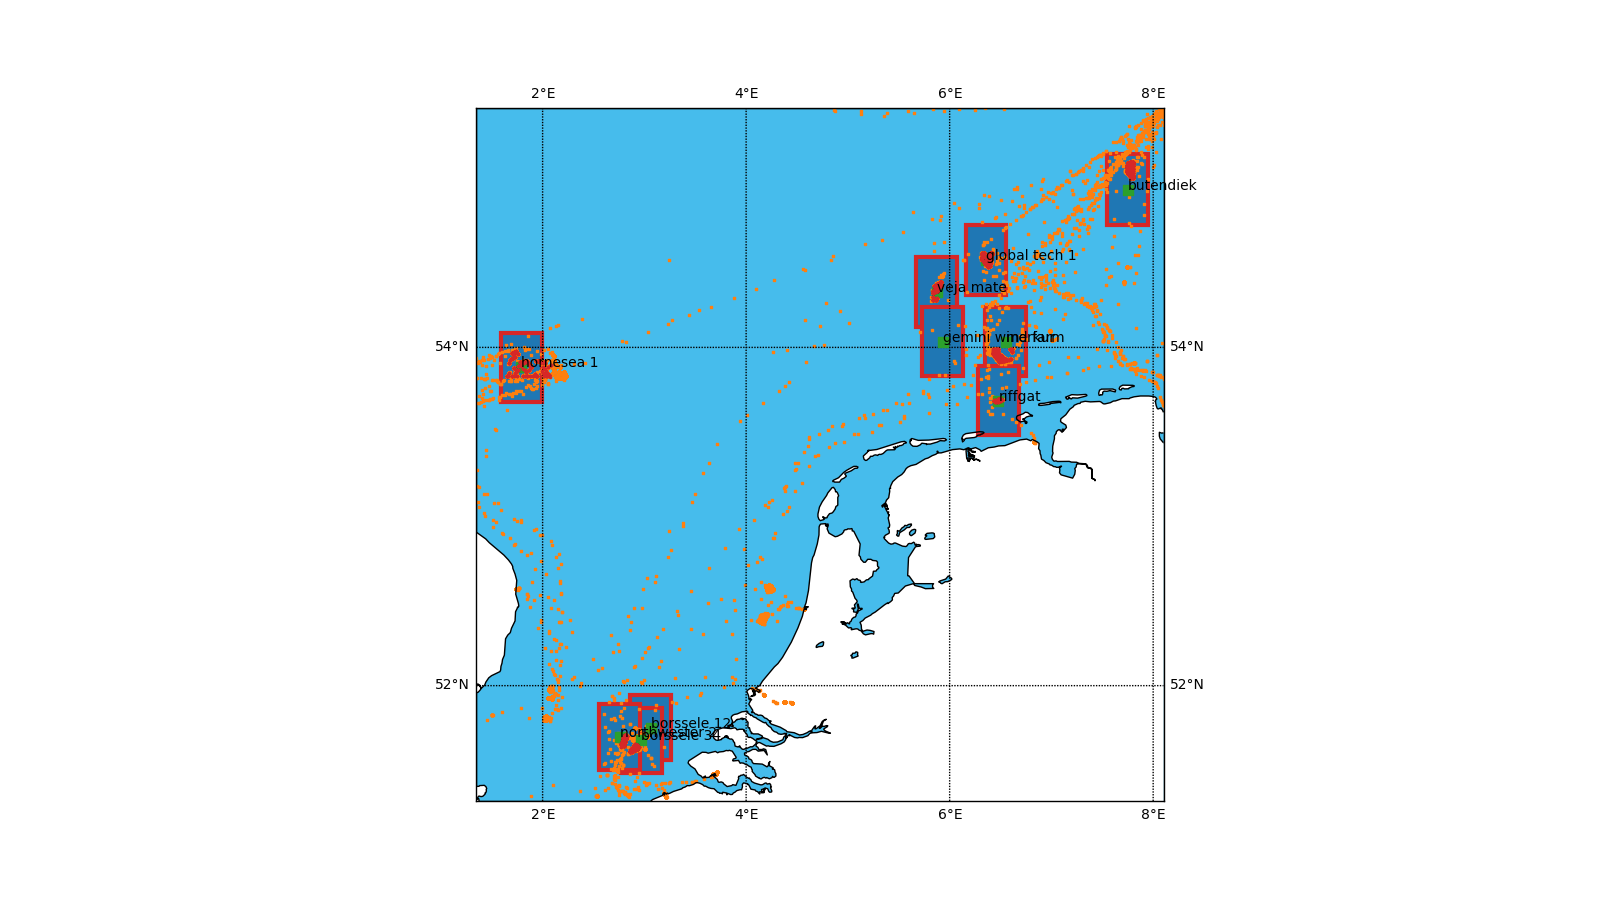

51.296670000000006 55.36 1.350167 8.101667
processing: 215644000_blue-tern


<IPython.core.display.Javascript object>


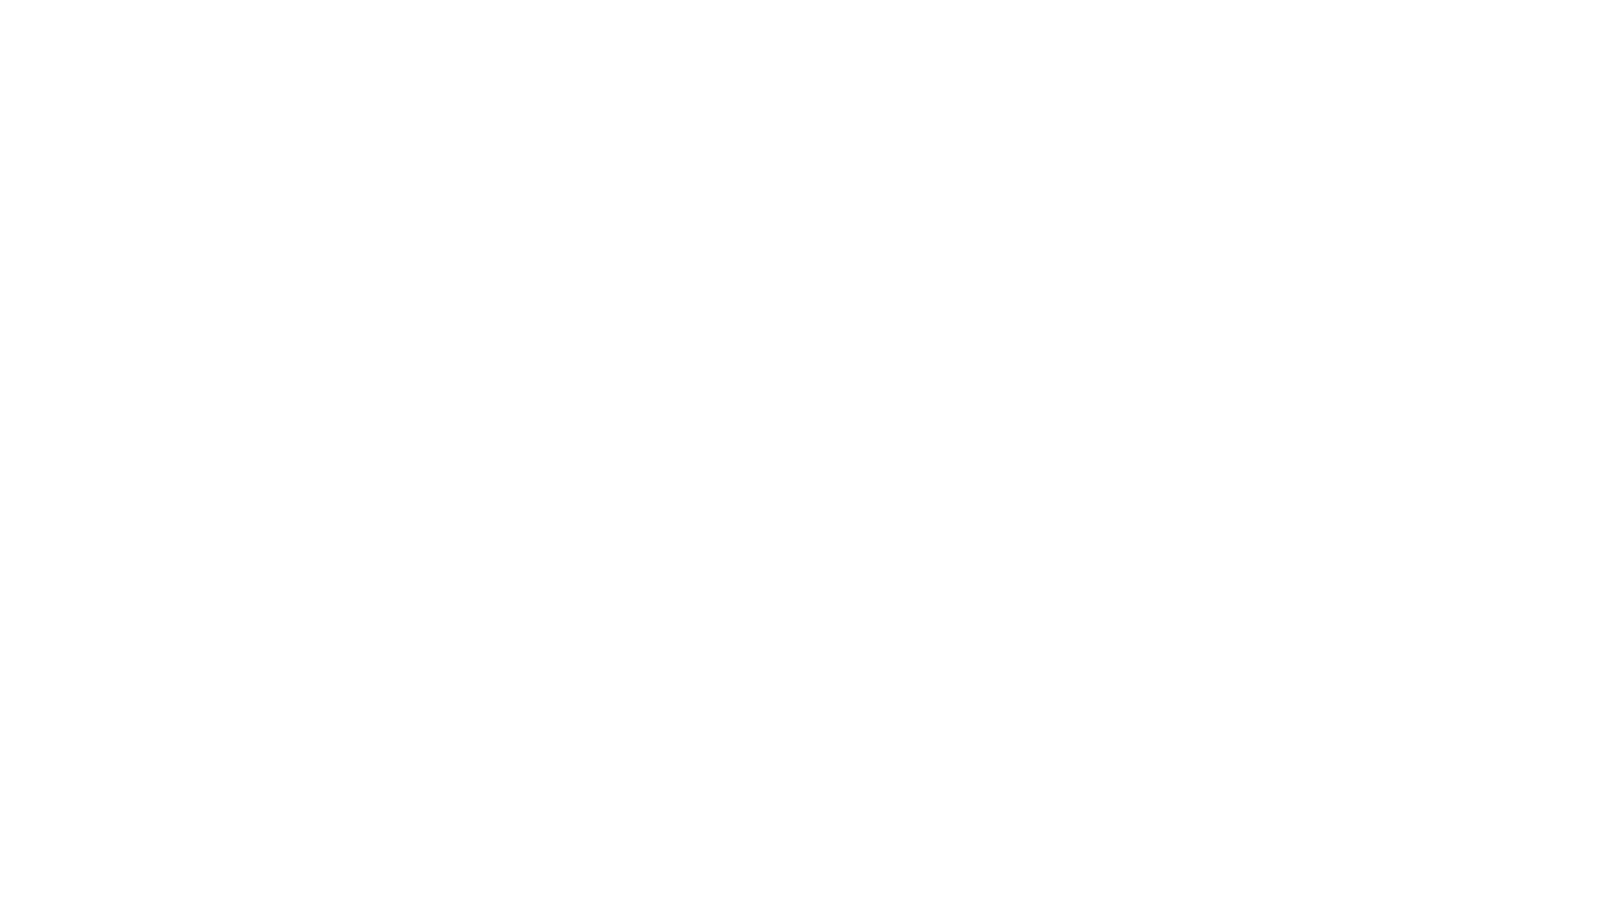

0 0 0 0
failed to plot vessel wind farms: float division by zero
processing: 229044000_brave-tern


<IPython.core.display.Javascript object>


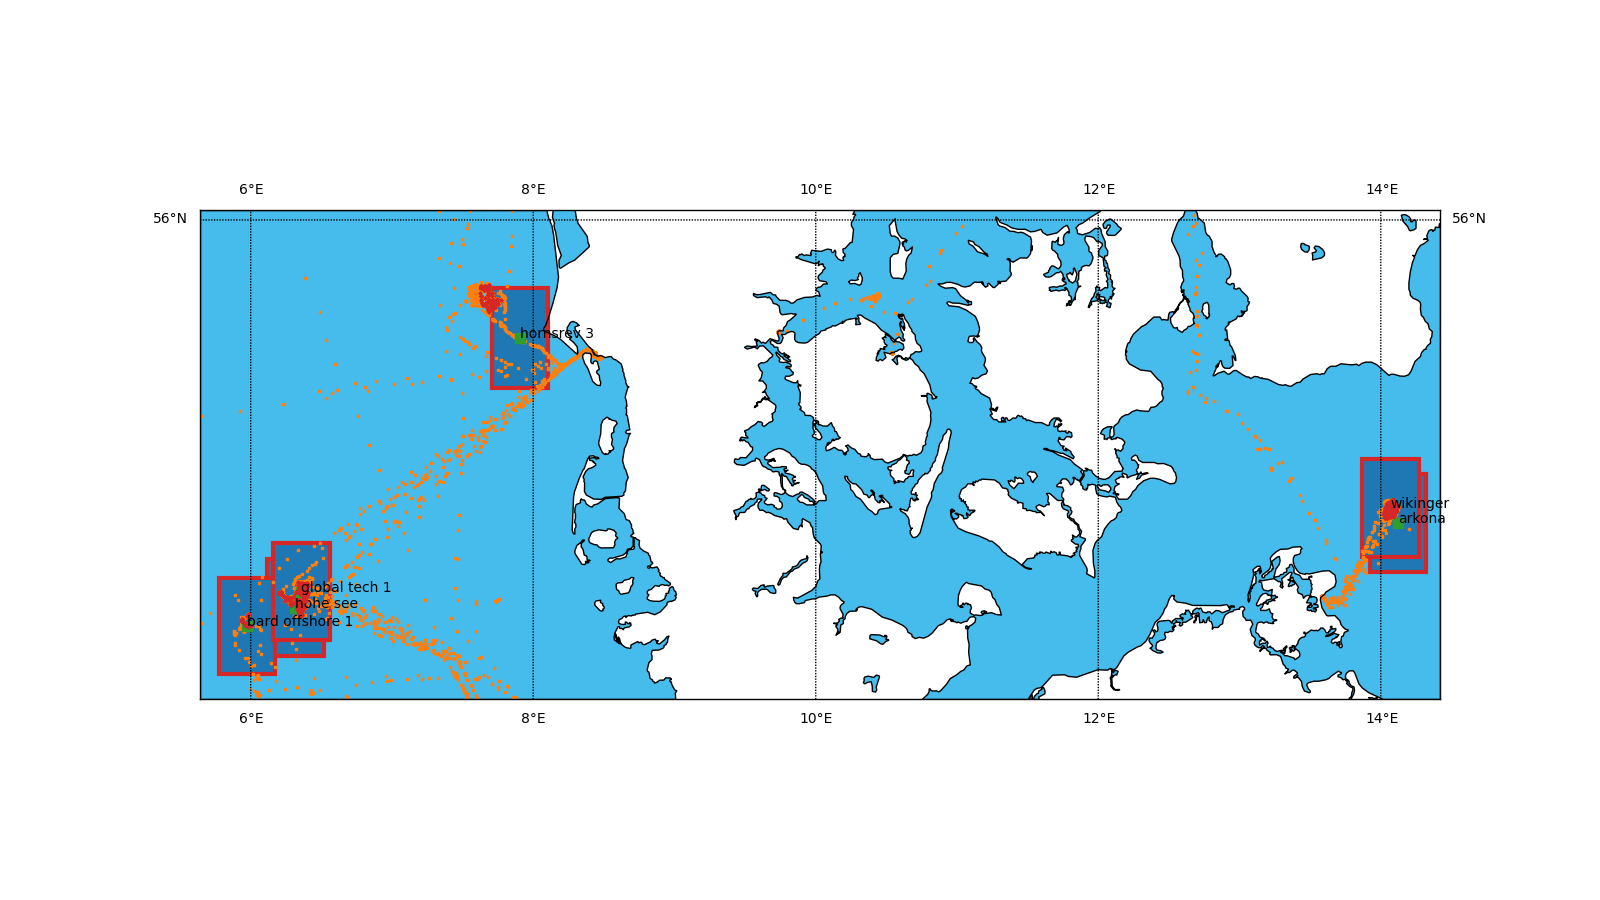

54.05534 56.04056 5.641 14.41925
processing: 218657000_vole-au-vent


<IPython.core.display.Javascript object>


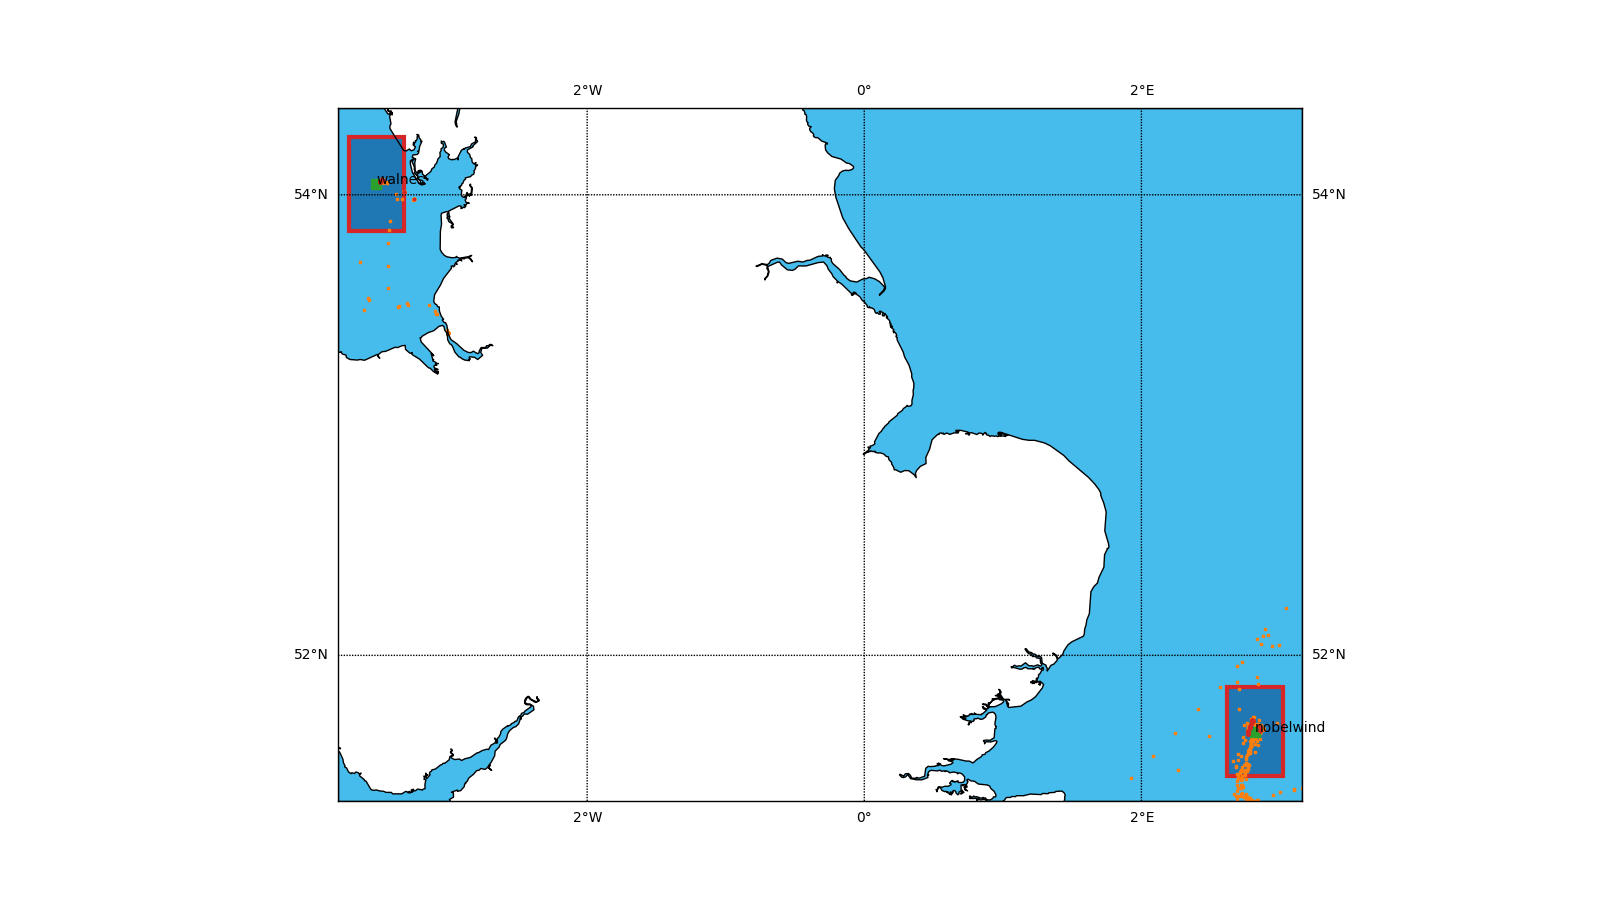

51.34823 54.366499999999995 -3.797433 3.15825
processing: 218389000_thor


<IPython.core.display.Javascript object>


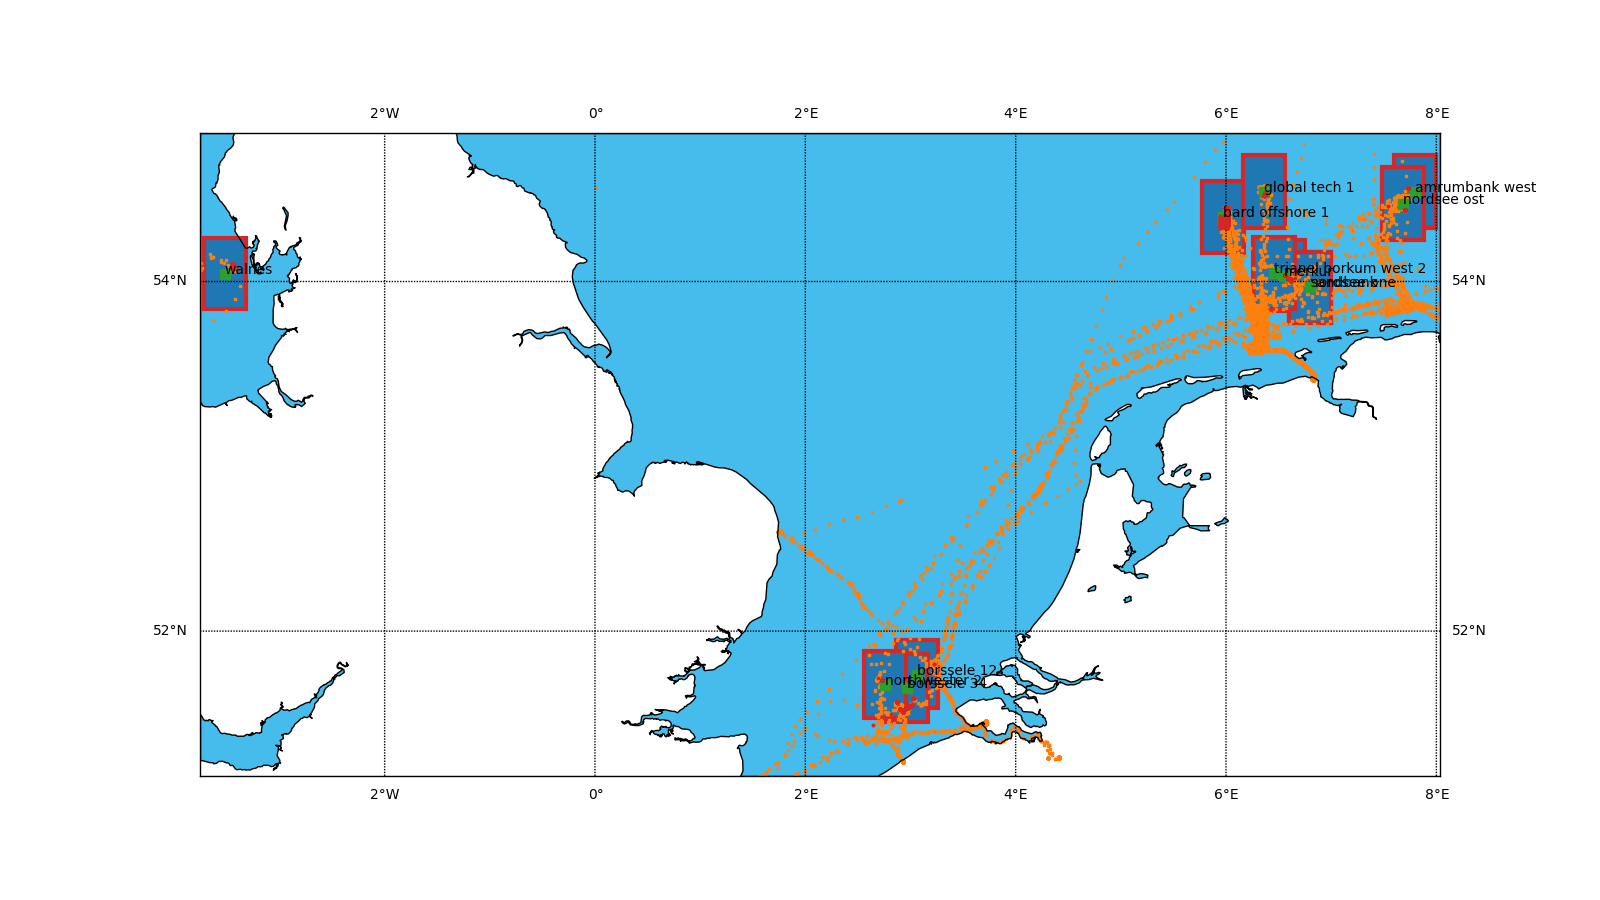

51.14461 54.820969999999996 -3.755582 8.034517000000001


In [9]:
# plot_vessel_farms(vessels['245924000_mpi-adventure'], vessel_farms['245924000_mpi-adventure'], wind_farms)
for vessel in vessels.keys():
    print(f'processing: {vessel}')
    try:
        plot_vessel_farms(vessels[vessel], vessel_farms[vessel], wind_farms)
    except Exception as e:
        print(f'failed to plot vessel wind farms: {e}')
        continue

## plot each wind farm
---

In [10]:
def plot_farm(track : pd.DataFrame, farm : str, vessel : str, figsize=(16,9), margin=0.3, savedir='../../results/installation-candidates/'):
    fig = plt.figure(figsize=figsize)
    plt.ioff()
    
    # find min and max of available tracks
    min_lon = tracks.longitude.min() - margin
    max_lon = tracks.longitude.max() + margin
    min_lat = tracks.latitude.min() - margin
    max_lat = tracks.latitude.max() + margin
    
    print(min_lon, min_lat, max_lon, max_lat)
    
    m = Basemap(llcrnrlon=min_lon,
            llcrnrlat=min_lat,
            urcrnrlon=max_lon,
            urcrnrlat=max_lat,
            resolution='h',
            projection='merc',
            lat_0=(max_lat - min_lat)/2,
            lon_0=(max_lon - min_lon)/2,
           )
    
    m.drawcoastlines()
    m.fillcontinents()
    # m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='#46bcec')
    m.fillcontinents(color = 'white',lake_color='#46bcec')
    # draw parallels
    m.drawparallels(np.arange(-90,90,2),labels=[1,1,1,1])
    # draw meridians
    m.drawmeridians(np.arange(-180,180,2),labels=[1,1,1,1])
        
    # plot tracks where vessel speed > 0
    vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude, 
                               vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)
    
    
    m.scatter(vessel_lon, vessel_lat, marker = 'o', color='tab:red', zorder = 5, s = 2)
    
    
    vessel_lon, vessel_lat = m(track.longitude, track.latitude)
    m.scatter(vessel_lon, vessel_lat, marker = 'o', color='tab:orange', zorder = 5, s = 2)
    
    farm_lon, farm_lat = m(wind_farms.loc[farm].longitude, wind_farms.loc[farm].latitude)
    m.scatter(farm_lon, farm_lat, marker='s', color='tab:green', zorder = 5, s = 50)
    plt.annotate(f'{wind_farms.loc[farm].windfarm_name}', xy=(farm_lon, farm_lat), zorder=5)
    
    plt.title(f'{vessel}: {farm}')
    
    plt.tight_layout()
    if savedir:
        plt.savefig(path.join(savedir, f'{vessel}_{farm}.png'), dpi=300)
    
    plt.close()

In [17]:
for vessel, farms in vessel_farms.items():
    print(f'{vessel}')
    for farm, tracks in farms.items():
        print(f'  {farm}')
        plot_farm(tracks, farm, vessel)

235090598_blue-tern
  hohe_see
5.936168 54.09017 6.681817 54.79774


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  merkur
6.2029570000000005 53.70389 6.918705 54.3865


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


245924000_mpi-adventure
  wikinger
13.77586 54.5341 14.37593 55.13419


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borkum_riffground
6.113667 53.69933 6.788167 54.387829999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  amrumbank_west
7.430000000000001 54.20566 8.0675 54.83967


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  trianel_borkum_west_2
6.113667 53.69933 6.788167 54.388


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  westmost_rough
-0.04883329999999997 53.34317 0.6283333 53.95983


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  london_array
1.137333 51.275830000000006 1.8725 51.987669999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


219019002_sea-challenger
  merkur
6.202495 53.70383 6.917797 54.3885


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  nordsee_one
6.640333 53.68267 7.379834 54.393829999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  sandbank
6.640333 53.68267 7.379834 54.393829999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  gode_wind_2
6.640333 53.68267 7.379834 54.393829999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_12
2.673187 51.28325 3.4259999999999997 52.10017


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_34
2.673187 51.28325 3.4259999999999997 52.10017


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  hornesea_1
1.356167 53.527330000000006 2.3895 54.29683


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  gudgeon
1.013167 52.91317 1.744167 53.6185


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  westmost_rough
-0.21116999999999997 53.47017 0.51 54.141329999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


253366000_vole-au-vent
  norther_offshore_wind_farm
2.433517 50.929970000000004 3.229183 51.995099999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  merkur
6.122517 53.61603 6.918767 54.2909


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_12
2.4632 51.38172 3.08355 52.00973


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_34
2.407217 51.328720000000004 3.083583 52.010299999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  kriegers_flak
12.458229999999999 54.66913 13.41755 55.397059999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  northwester_2
2.407217 51.328720000000004 3.08405 52.010299999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  nobelwind
2.4973 51.321670000000005 3.180033 51.9937


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  hornsrev_3
7.306317 55.33368 8.075017 56.040049999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


246777000_mpi-resolution
  lincs
0.15965000000000001 52.825050000000005 0.8235683 53.54846


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  westmost_rough
-0.04518 53.31358 0.6303749999999999 53.96834


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


245179000_aeolus
  norther_offshore_wind_farm
2.639667 51.18883 3.3801669999999997 51.871669999999995


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  veja_mate
5.5142 53.72005 6.380758999999999 54.374269999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_12
2.4736670000000003 51.30283 3.334333 52.08683


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_34
2.4736670000000003 51.30283 3.334333 52.08683


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  gemini_wind_farm
5.5142 53.661150000000006 6.409892 54.374269999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  walnes
-4.113167 53.708000000000006 -3.2465 54.452999999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  northwester_2
2.4755000000000003 51.30283 3.334167 52.08683


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  luchterduinen
3.8244500000000006 52.062270000000005 4.505567 52.731609999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


229080000_bold-tern
  veja_mate
5.538666 53.974000000000004 6.212833 54.67783


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  global_tech_1
6.01733 54.161170000000006 6.7175 54.841829999999995


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  merkur
6.1215 53.61683 6.915667 54.2915


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  butendiek
7.438667000000001 54.666000000000004 8.101667 55.36


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  riffgat
6.138334 53.381840000000004 6.814667 54.00333


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_12
2.473167 51.296670000000006 3.2449999999999997 52.001999999999995


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_34
2.473167 51.296670000000006 3.2449999999999997 52.001999999999995


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  gemini_wind_farm
5.5795 54.02217 6.1795 54.62217


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  hornesea_1
1.350167 53.530170000000005 2.3804999999999996 54.27766


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  northwester_2
2.473167 51.32867 3.1301669999999997 52.001999999999995


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


229044000_brave-tern
  hohe_see
5.9019520000000005 54.099270000000004 6.6843129999999995 54.7972


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  bard_offshore_1
5.641 54.05534 6.299833 54.70717


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  global_tech_1
6.0215000000000005 54.161170000000006 6.7118329999999995 54.840669999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  arkona
13.72365 54.50695 14.40792 55.17547


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  wikinger
13.723669999999998 54.50133 14.41925 55.17547


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  hornsrev_3
7.324743 55.33397 8.07328 56.04056


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


218657000_vole-au-vent
  walnes
-3.797433 53.6811 -2.9517330000000004 54.366499999999995
  nobelwind
2.4658670000000003 51.34823 3.15825 52.010099999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


218389000_thor
  bard_offshore_1
5.640282 53.997930000000004 6.319567999999999 54.714169999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  global_tech_1
6.058918 54.173640000000006 6.682463 54.79819


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  merkur
6.260003 53.71379 6.91941 54.33665


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  nordsee_one
6.293958 53.71379 6.91941 54.314139999999995


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  amrumbank_west
7.236819000000001 54.099880000000006 8.034517000000001 54.820969999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  nordsee_ost
7.236819000000001 54.099880000000006 8.034517000000001 54.820969999999996


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  sandbank
6.293717 53.71345 6.955401999999999 54.32141


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  trianel_borkum_west_2
6.3177900000000005 53.705470000000005 6.91886 54.306839999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_12
2.5150270000000003 51.21388 3.527898 52.107609999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  borssele_34
2.394565 51.21388 3.527898 52.107609999999994


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  walnes
-3.755582 53.771240000000006 -3.119482 54.4002


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


  northwester_2
2.340592 51.14461 3.1674379999999998 52.02359


/tmp/ipykernel_2002805/760801539.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessel_lon, vessel_lat = m(vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].longitude,
/tmp/ipykernel_2002805/760801539.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vessels[vessel][wind_farms.loc[farm].construction_begin:wind_farms.loc[farm].construction_end][vessels[vessel].speed > 0].latitude)


253609000_taillevent
215644000_blue-tern


---

# Vessel tracks raw plots

In [ ]:
for vessel, data in vessels.items():
    print(vessel)
    try:
        plot_track(data, vessel, wind_farms=wind_farms, figsize=(17,8))
    except Exception as e:
        print(f'failed to plot data for vessel {vessel}: {e}')